## Here we will classify data from a satellite MODIS available on HUGGINGFACE

# For downloading data from HUGGINGFACE we need to install DATASET Module using 
#!pip install dataset

In [128]:
import datasets

In [129]:
# Importing needed Modules
import pandas as pd
import os # for making directories
import seaborn as sns

In [130]:
data_url="nasa-cisto-data-science-group/modis-lake-powell-toy-dataset"

In [131]:
#downlaoding Dataset from hugging face
sat_data= datasets.load_dataset(data_url)

Using custom data configuration nasa-cisto-data-science-group--modis-lake-powell-toy-dataset-586869bbceaff01a


Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

0 tables [00:00, ? tables/s]

0 tables [00:00, ? tables/s]

Dataset csv downloaded and prepared to C:\Users\nikhi\.cache\huggingface\datasets\nasa-cisto-data-science-group___csv\nasa-cisto-data-science-group--modis-lake-powell-toy-dataset-586869bbceaff01a\0.0.0\51cce309a08df9c4d82ffd9363bbe090bf173197fc01a71b034e8594995a1a58. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

In [132]:
sat_data_train=pd.DataFrame(sat_data["train"])

In [133]:
sat_data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   water           800 non-null    int64
 1   sur_refl_b01_1  800 non-null    int64
 2   sur_refl_b02_1  800 non-null    int64
 3   sur_refl_b03_1  800 non-null    int64
 4   sur_refl_b04_1  800 non-null    int64
 5   sur_refl_b05_1  800 non-null    int64
 6   sur_refl_b06_1  800 non-null    int64
 7   sur_refl_b07_1  800 non-null    int64
 8   ndvi            800 non-null    int64
 9   ndwi1           800 non-null    int64
 10  ndwi2           800 non-null    int64
dtypes: int64(11)
memory usage: 68.9 KB


#### EXPLORATORY DATA ANALYSIS

In [134]:
sat_data_train.describe()

,water,sur_refl_b01_1,sur_refl_b02_1,sur_refl_b03_1,sur_refl_b04_1,sur_refl_b05_1,sur_refl_b06_1,sur_refl_b07_1,ndvi,ndwi1,ndwi2
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,0.506250,1209.758750,1577.253750,743.000000,1028.395000,1969.371250,1932.658750,1587.696250,87.131250,-2336.037500,-914.291250
std,0.500274,1287.886517,1554.828794,1004.334475,1065.582946,1467.613243,1541.910775,1395.266352,2518.736818,3404.038705,3863.695634
min,0.000000,8.000000,1.000000,-100.000000,6.000000,-92.000000,51.000000,0.000000,-9493.000000,-9862.000000,-9692.000000
25%,0.000000,238.250000,168.000000,286.000000,413.000000,553.500000,511.250000,316.750000,-1533.000000,-4577.500000,-2846.250000
50%,1.000000,886.500000,1394.000000,540.000000,809.500000,1818.500000,1498.500000,1174.000000,733.500000,-1582.000000,-703.500000
75%,1.000000,1893.250000,2667.750000,857.000000,1313.250000,3210.750000,3254.250000,2672.000000,1729.500000,-766.500000,869.000000
max,1.000000,9222.000000,8837.000000,8909.000000,9162.000000,6382.000000,6610.000000,6128.000000,8587.000000,8823.000000,10000.000000


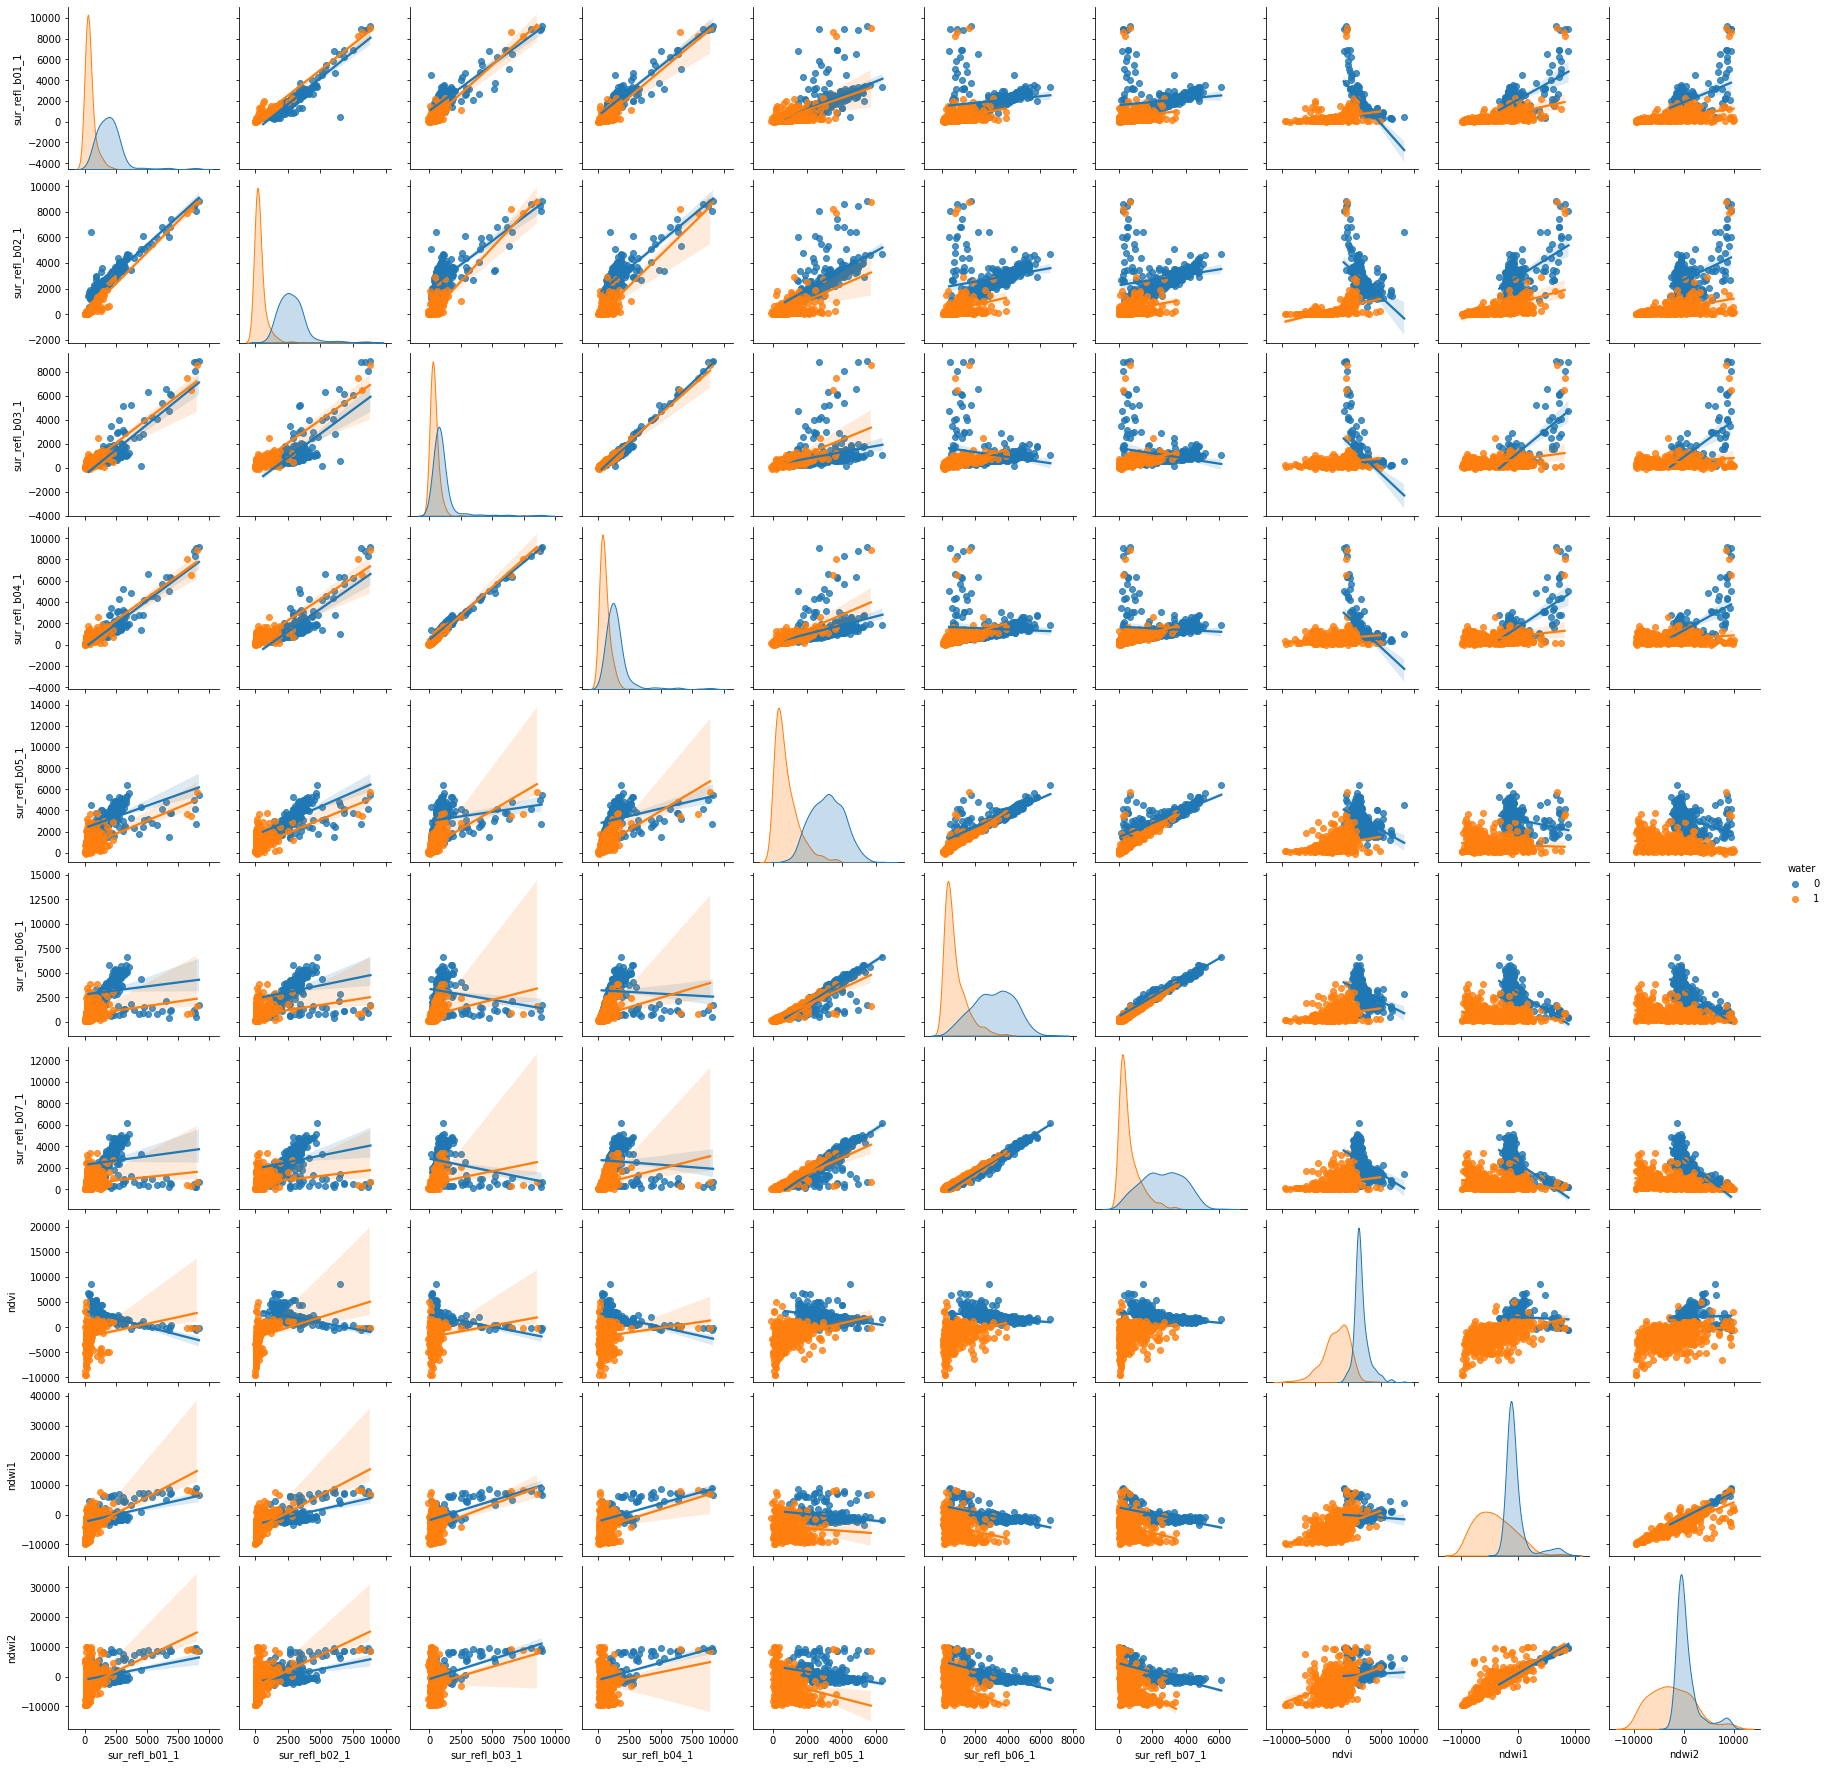

In [135]:
sns.pairplot(sat_data_train, hue="water", kind='reg')

array([[<AxesSubplot:title={'center':'water'}>,
        <AxesSubplot:title={'center':'sur_refl_b01_1'}>,
        <AxesSubplot:title={'center':'sur_refl_b02_1'}>],
       [<AxesSubplot:title={'center':'sur_refl_b03_1'}>,
        <AxesSubplot:title={'center':'sur_refl_b04_1'}>,
        <AxesSubplot:title={'center':'sur_refl_b05_1'}>],
       [<AxesSubplot:title={'center':'sur_refl_b06_1'}>,
        <AxesSubplot:title={'center':'sur_refl_b07_1'}>,
        <AxesSubplot:title={'center':'ndvi'}>],
       [<AxesSubplot:title={'center':'ndwi1'}>,
        <AxesSubplot:title={'center':'ndwi2'}>, <AxesSubplot:>]],
      dtype=object)

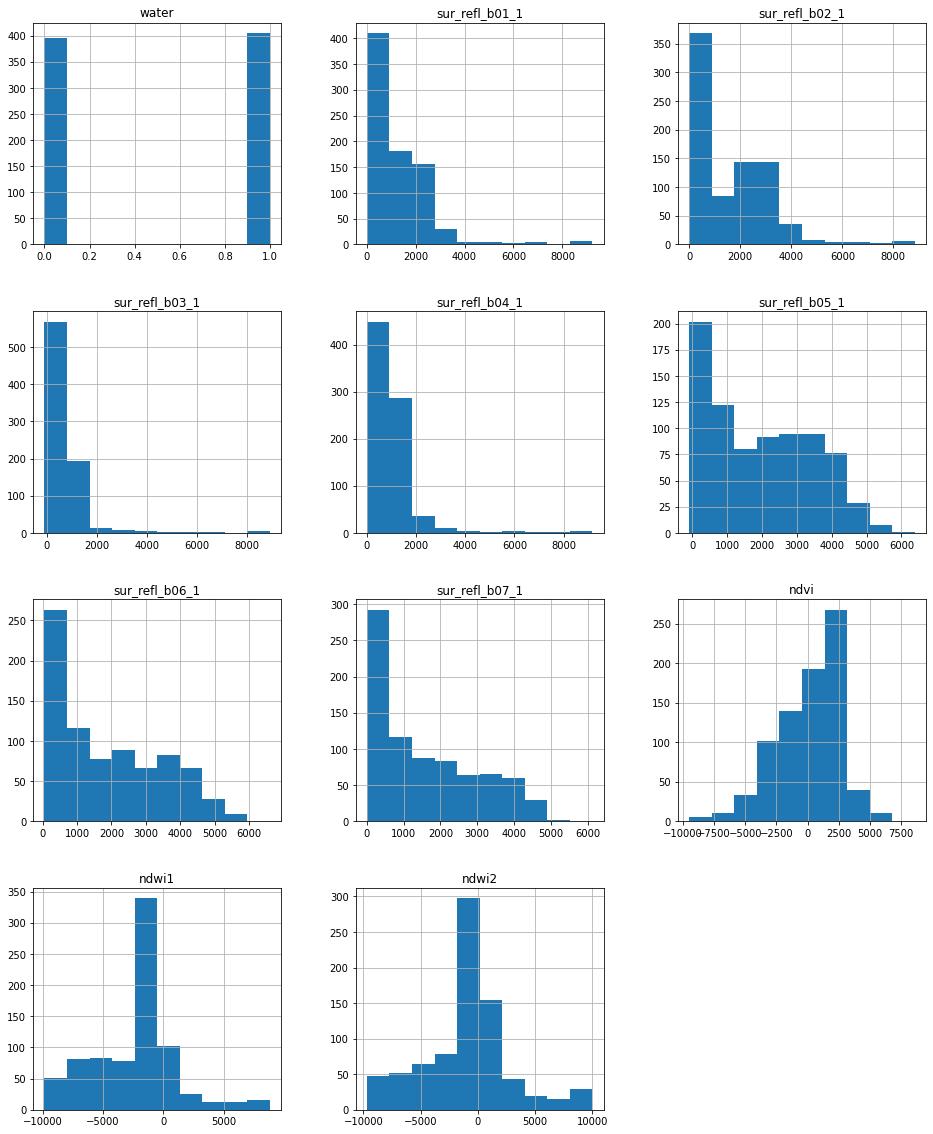

In [136]:
sat_data_train.hist(figsize=(16,20))

<AxesSubplot:>

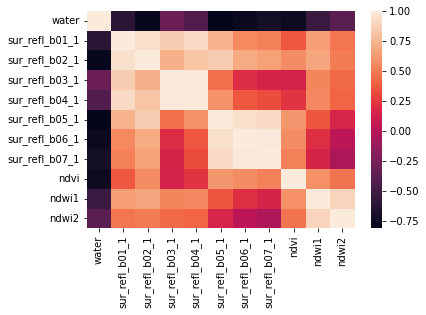

In [137]:
sns.heatmap(sat_data_train.corr())

In [138]:
# full correlation table
sat_data_train.corr().style.background_gradient(cmap='viridis')

,water,sur_refl_b01_1,sur_refl_b02_1,sur_refl_b03_1,sur_refl_b04_1,sur_refl_b05_1,sur_refl_b06_1,sur_refl_b07_1,ndvi,ndwi1,ndwi2
water,1.000000,-0.604949,-0.780173,-0.315886,-0.431506,-0.813848,-0.769546,-0.720314,-0.751600,-0.536501,-0.382001
sur_refl_b01_1,-0.604949,1.000000,0.945684,0.857138,0.918364,0.736051,0.555226,0.520304,0.365613,0.644189,0.479509
sur_refl_b02_1,-0.780173,0.945684,1.000000,0.725588,0.814153,0.854383,0.699178,0.653082,0.574397,0.676687,0.499082
sur_refl_b03_1,-0.315886,0.857138,0.725588,1.000000,0.979398,0.447638,0.195292,0.152493,0.148278,0.540643,0.427898
sur_refl_b04_1,-0.431506,0.918364,0.814153,0.979398,1.000000,0.592604,0.365734,0.324536,0.224591,0.547416,0.407715
sur_refl_b05_1,-0.813848,0.736051,0.854383,0.447638,0.592604,1.000000,0.948514,0.919976,0.611504,0.362238,0.163515
sur_refl_b06_1,-0.769546,0.555226,0.699178,0.195292,0.365734,0.948514,1.000000,0.991028,0.571557,0.203993,0.023099
sur_refl_b07_1,-0.720314,0.520304,0.653082,0.152493,0.324536,0.919976,0.991028,1.000000,0.519074,0.156148,-0.038017
ndvi,-0.751600,0.365613,0.574397,0.148278,0.224591,0.611504,0.571557,0.519074,1.000000,0.588516,0.469716
ndwi1,-0.536501,0.644189,0.676687,0.540643,0.547416,0.362238,0.203993,0.156148,0.588516,1.000000,0.890413


In [139]:
#we can see here band b02,b05, b06, b07, ndvi are highly correlated to water
data_to_feed=sat_data_train.loc[:,sat_data_train.corr()["water"]<-.70]

#### AS IN REAL LIFE SCENERIOS WE WILL GET UNSUPERVISED DATA WITH NO LABLES, WE WILL TRY KMEANS MODEL

In [152]:
train_columns=data_to_feed.columns

In [153]:
from sklearn.cluster import KMeans

In [154]:
x_train=data_to_feed.values

In [155]:
k_mean_model=KMeans(n_clusters=2)

In [156]:
k_mean_model.fit(x_train)

KMeans(n_clusters=2)

In [157]:
labels= k_mean_model.labels_

In [158]:
labels
sat_data_train["k_mean_pred"]=labels

In [159]:
from sklearn.metrics import accuracy_score

In [160]:
true_val= sat_data_train['water'].values
pred_val=sat_data_train['k_mean_pred'].values

In [161]:
accuracy_score(true_val,pred_val)

0.9725

#### we got accuracy of  97 percent

In [162]:
# let us check this for test data

In [163]:
sat_data_test=pd.DataFrame(sat_data['test'])


In [164]:
ytest=sat_data_test[train_columns].values

In [165]:
y_pred=k_mean_model.predict(ytest)

In [166]:
sat_data_test["prediction"]=y_pred

In [167]:
accuracy_score(sat_data_test['water'].values, y_pred)

0.98

In [168]:
from sklearn.metrics import confusion_matrix

In [169]:
confusion_matrix(sat_data_test['water'].values, y_pred)

array([[105,   0],
       [  4,  91]], dtype=int64)

#### We are getting good result using Kmeans and that makes sense to classify images with diffrent feature 


